In [5]:
## import public packages
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy.stats import multivariate_normal
import torch
from torch.autograd import Variable

## import self-written packages 
from util import *
from prim_fdr import *
from data_loader import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Test GTEx

In [6]:
## loading GTEx data
p,x,n_full,cate_name = load_GTEx_full(verbose=True)

## testing the BH method
n_rej,t_rej=bh(p,alpha=0.1,n_sample=n_full,verbose=True)

## testing the Storey BH method
n_rej,t_rej,pi0_hat=storey_bh(p,alpha=0.1,n_sample=n_full,lamb=0.995,verbose=True)

## Load GTEx full data ##
# all hypothesis: 10623893
# filtered hypothesis: 169301
# p=0.00226011, x=[13.73583078  0.08957559  0.112      16.        ]
# p=0.00254028, x=[13.74614226  0.08957559  0.         16.        ]
# p=0.000610689, x=[13.74784609  0.08957559  0.         16.        ]
# p=0.00071358, x=[1.37478546e+01 8.95755866e-02 1.20000000e-02 1.60000000e+01]
# p=0.000228687, x=[13.74820448  0.08957559  0.209      13.        ]


## bh testing summary ##
# n_rej = 29348
# t_rej = 0.000276


## sbh summary ##
# n_rej = 29689
# t_rej = 0.000286
# pi_0 estimate = 0.975




## PrimFDR_init starts
# Learning null distribution
!!! the model does not converge !!!
Slope: w=0.8427549928001379, a=-0.42949707031250006
Bump 0: w=0.036673573643557646, mu=[0.48224633], sigma=[0.09290472]
Bump 1: w=0.02047669421695345, mu=[0.81970942], sigma=[0.06289689]
Bump 2: w=0.03752783220619592, mu=[0.1150274], sigma=[0.04393551]
Bump 3: w=0.028005569022891065, mu=[0.64093046], sigma=[0.0942006]
Bump 4: w=0.034561338110263976, mu=[0.34055601], sigma=[0.06421751]




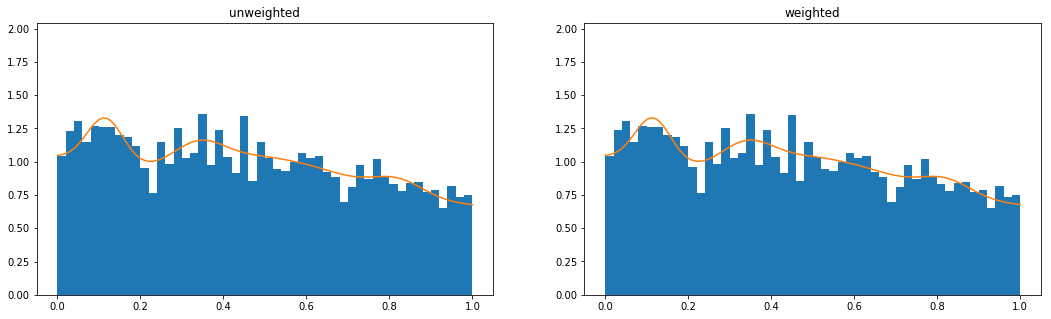

# Learning alternative distribution
Slope: w=0.8982797036893312, a=0.5470556640625
Bump 0: w=0.03208821103113153, mu=[0.74189867], sigma=[0.08088025]
Bump 1: w=0.004241354693326308, mu=[0.19675214], sigma=[0.06326271]
Bump 2: w=0.010399222732843556, mu=[0.53232698], sigma=[0.08540281]
Bump 3: w=0.017599518079942165, mu=[0.22998216], sigma=[0.03138695]
Bump 4: w=0.03739198977342528, mu=[0.92936244], sigma=[0.03209569]




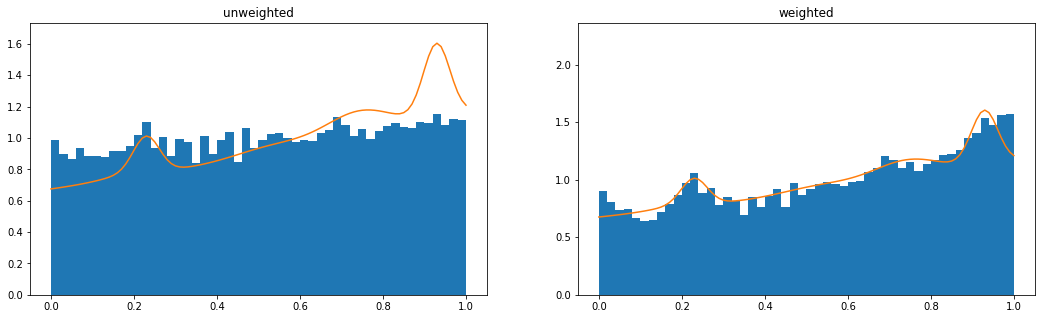

gamma1 0.20000007597428435
0 0.9999999622471164 117488 51813 0.44100674111398613
0 0.4999999811235582 117488 51813 0.44100674111398613
0 0.2499999905617791 117488 51813 0.44100674111398613
0 0.12499999528088955 117488 51813 0.44100674111398613
0 0.062499997640444775 116042 50769 0.4375053859809379
0 0.031249998820222388 87610 31183 0.3559296883917361
0 0.015624999410111194 60314 15330 0.2541698444805518
0 0.007812499705055597 44294 7703 0.17390617239355216
0 0.0039062498525277984 33561 3870 0.11531241619737195
0 0.0019531249262638992 26466 1871 0.07069447593138366
0.0009765624631319496 0.0019531249262638992 30236 2823 0.0933655245402831
0.0014648436946979244 0.0019531249262638992 32043 3332 0.1039852697937147
0.0014648436946979244 0.0017089843104809118 31233 3079 0.09858162840585279
0.001586914002589418 0.0017089843104809118 31651 3221 0.10176613693090265
0.001586914002589418 0.001647949156535165 31464 3155 0.10027332824815663
0.001586914002589418 0.0016174315795622915 31356 3115 0.099

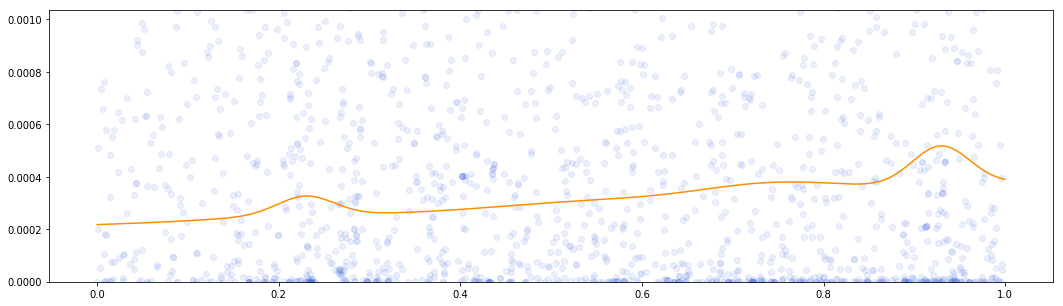

## PrimFDR_init finishes

gamma1 0.2196918532684749
0 1.0000000000000002 117488 51813 0.44100674111398613
0 0.5000000000000001 117488 51813 0.44100674111398613
0 0.25000000000000006 117488 51813 0.44100674111398613
0 0.12500000000000003 117488 51813 0.44100674111398613
0 0.06250000000000001 117084 51545 0.4402394861808616
0 0.03125000000000001 87835 31841 0.36250925029885583
0 0.015625000000000003 60411 15547 0.25735379318336066
0 0.007812500000000002 44271 7913 0.17874003297869936
0 0.003906250000000001 33410 3906 0.11691110445974259
0 0.0019531250000000004 26496 1897 0.07159571256038648
0.0009765625000000002 0.0019531250000000004 30128 2855 0.0947623473181094
0.0014648437500000004 0.0019531250000000004 31861 3399 0.1066821505916324
0.0014648437500000004 0.0017089843750000004 30961 3105 0.10028745841542586
0.0014648437500000004 0.0015869140625000004 30571 3000 0.09813221680677767
0.0015258789062500004 0.0015869140625000004 30769 3058 0.09938574539309045
0.0015563964843750004 0.0015869

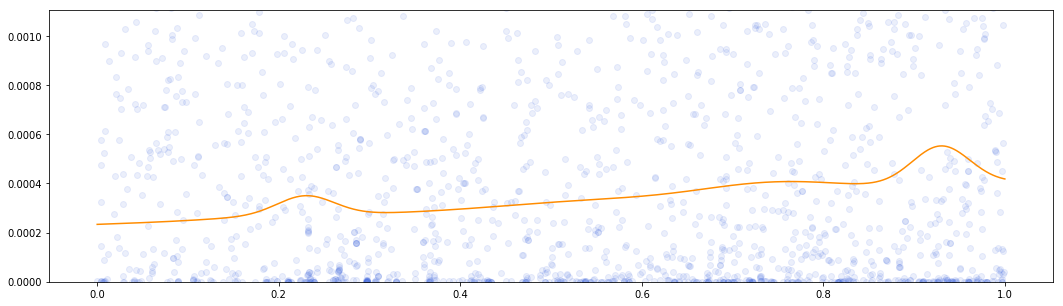

In [ ]:
n_rej,t,_=PrimFDR(p,x[:,3],5,alpha=0.1,h=None,n_itr=5000,verbose=True)

In [ ]:
_=PrimFDR_cv(p,x[:,3],5,alpha=0.1,n_itr=10000,h=None,verbose=True)